# PCA Basics - Coding Exercises Solution

In this notebook you will apply what you learned about PCA in the previous lesson to real stock data.

### Install Packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 2.5MB 212kB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 4.6MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 3.7MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 3.4MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 3.8MB/s eta 0:00:01
    100% |████████████████████████████████| 624kB 811kB/s eta 0:00:01
    100% |████████████████████████████████| 1.0MB 504kB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 4.4MB/s eta 0:00:01
    100% |████████████████████████████████| 3.8MB 139kB/s eta 0:00:01    44% |██████████████▏                 | 1.7MB 24.6MB/s eta 0:00:01    76% |████████████████████████▋       | 2.9MB 24.1MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 4.5MB/s eta 0:00:01


  Running setup.py bdist_wheel for zipline ... done
  Stored in directory: /root/.cache/pip/wheels/a4/d6/67/f303ab028b004bf8e00c05b5b04fba83d8ec238b6547becdb7
  Running setup.py bdist_wheel for Logbook ... done
  Stored in directory: /root/.cache/pip/wheels/06/13/e9/88e9e8184d89671ffc754dc80f5eb01dabd72071bdb802c5d1
  Running setup.py bdist_wheel for cyordereddict ... done
  Stored in directory: /root/.cache/pip/wheels/0b/9d/8b/5bf3e22c1edd59b50f11bb19dec9dfcfe5a479fc7ace02b61f
  Running setup.py bdist_wheel for bottleneck ... done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
  Running setup.py bdist_wheel for bcolz ... done
  Stored in directory: /root/.cache/pip/wheels/c5/cc/1b/2cf1f88959af5d7f4d449b7fc6c9452d0ecbd86fd61a9ee376
  Running setup.py bdist_wheel for alembic ... done
  Stored in directory: /root/.cache/pip/wheels/67/59/2e/bbf7e5d1ac878f9735223846512f71782bd7889e7820ff3740
  Running setup.py bdist_wheel for inte

# Get Returns

In the previous lesson we used 2-dimensional randomly correlated data to see how we can use PCA to for dimensionality reduction. In this notebook, we will do the same but for 490-dimensional data of stock returns. We will get the stock returns using Zipline and data from Quotemedia, just as we learned in previous lessons. The function `get_returns(start_date, end_date)` in the `utils` module, gets the data from the Quotemedia data bundle and produces the stock returns for the given `start_date` and `end_date`. You are welcome to take a look at the `utils` module to see how this is done.

In the code below, we use `utils.get_returns` funtion to get the returns for stock data between `2011-01-05` and `2016-01-05`. You can change the start and end dates, but if you do, you have to make sure the dates are valid trading dates. 

In [2]:
import utils

# Get the returns for the fiven start and end date. Both dates must be valid trading dates
returns = utils.get_returns(start_date='2011-01-05', end_date='2016-01-05')

# Display the first rows of the returns
returns.head()

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABC]),Equity(6 [ABT]),Equity(7 [ACN]),Equity(8 [ADBE]),Equity(9 [ADI]),...,Equity(481 [XL]),Equity(482 [XLNX]),Equity(483 [XOM]),Equity(484 [XRAY]),Equity(485 [XRX]),Equity(486 [XYL]),Equity(487 [YUM]),Equity(488 [ZBH]),Equity(489 [ZION]),Equity(490 [ZTS])
2011-01-07 00:00:00+00:00,0.008437,0.014230,0.026702,0.007146,0.0,0.001994,0.004165,0.001648,-0.007127,-0.005818,...,-0.001838,-0.005619,0.005461,-0.004044,-0.013953,0.0,0.012457,-0.000181,-0.010458,0.0
2011-01-10 00:00:00+00:00,-0.004174,0.006195,0.007435,0.018852,0.0,-0.005714,-0.008896,-0.008854,0.028714,0.002926,...,0.000947,0.007814,-0.006081,0.010466,0.009733,0.0,0.001440,0.007784,-0.017945,0.0
2011-01-11 00:00:00+00:00,-0.001886,-0.043644,-0.005927,-0.002367,0.0,0.009783,-0.002067,0.013717,0.000607,0.008753,...,0.001314,0.010179,0.007442,0.007351,0.006116,0.0,-0.006470,0.035676,0.007467,0.0
2011-01-12 00:00:00+00:00,0.017254,-0.008237,0.013387,0.008133,0.0,-0.005979,-0.001011,0.022969,0.017950,0.000257,...,0.004986,0.015666,0.011763,0.027182,0.004386,0.0,0.002631,0.014741,-0.011903,0.0
2011-01-13 00:00:00+00:00,-0.004559,0.000955,0.003031,0.003657,0.0,0.014925,-0.004451,-0.000400,-0.005719,-0.005012,...,0.030499,-0.003217,0.001694,0.000547,-0.018235,0.0,-0.005084,-0.004665,-0.009178,0.0


# Visualizing the Data

As we san see above, the `returns` dataframe, contains the stock returns for 490 assets. Eventhough we can't make 490-dimensional plots, we can plot the data for two assets at a time. This plot willl then show us visually how correlated the stock returns are for a pair of stocks.

In the code below, we use the `.plot.scatter(x, y)` method to make a scatter plot of the returns of column `x` and column `y`. The `x` and `y` parameters are both integers and idicate the number of the columns we want to plot. For example, if we want to see how correlated the stock of `AAL` and `AAPL` are, we can choose `x=1` and `y=3`, since we can see from the dataframe above that stock `AAL` corresponds to column number `1`, and stock `AAPL` corresponds to column number `3`. You are encouraged to plot different pairs of stocks to see how correlated they are.  

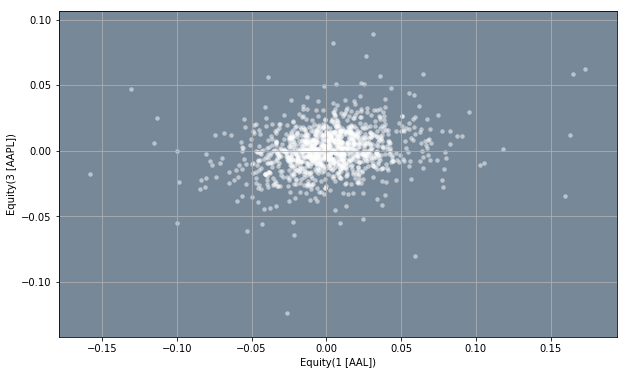

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Make scatter plot
ax = returns.plot.scatter(x = 1, y = 3, grid = True, color = 'white', alpha = 0.5, linewidth = 0)
ax.set_facecolor('lightslategray')

# Correlation of Returns

Apart from visualizing the correlation between stocks as we did above, we can also create a correlation dataframe that gives the correlation between every stock. In the code below, we can accomplish this using the `.corr()` method to calculate the correlation between all the paris of stocks in our `returns` dataframe.

In [4]:
# Display the correlation between all stock pairs in the returns dataframe
returns.corr(method = 'pearson').head()

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABC]),Equity(6 [ABT]),Equity(7 [ACN]),Equity(8 [ADBE]),Equity(9 [ADI]),...,Equity(481 [XL]),Equity(482 [XLNX]),Equity(483 [XOM]),Equity(484 [XRAY]),Equity(485 [XRX]),Equity(486 [XYL]),Equity(487 [YUM]),Equity(488 [ZBH]),Equity(489 [ZION]),Equity(490 [ZTS])
Equity(0 [A]),1.000000,0.327356,0.350274,0.357941,0.219881,0.443607,0.498730,0.528160,0.476105,0.488426,...,0.547015,0.448453,0.520123,0.568743,0.524692,0.333886,0.405655,0.485227,0.524167,0.186108
Equity(1 [AAL]),0.327356,1.000000,0.243475,0.227264,0.143983,0.296306,0.244604,0.269950,0.308133,0.285740,...,0.361259,0.241502,0.177152,0.356118,0.258117,0.173434,0.254696,0.289684,0.344630,0.138426
Equity(2 [AAP]),0.350274,0.243475,1.000000,0.210157,0.211495,0.290848,0.329866,0.293221,0.301972,0.309280,...,0.312257,0.289204,0.282981,0.346646,0.275858,0.268899,0.329385,0.302148,0.329689,0.150945
Equity(3 [AAPL]),0.357941,0.227264,0.210157,1.000000,0.124744,0.261941,0.260044,0.345766,0.317921,0.384693,...,0.292361,0.284832,0.320862,0.342525,0.322910,0.251614,0.297765,0.333980,0.349393,0.155476
Equity(4 [ABBV]),0.219881,0.143983,0.211495,0.124744,1.000000,0.265333,0.355565,0.214197,0.223873,0.256881,...,0.163470,0.235468,0.229631,0.247383,0.226287,0.253060,0.203928,0.304504,0.183191,0.340621


As we can see, this is a better way to see how correlated the stock returns are than through visulaization. By looking at the table we can easily spot which pairs of stock have the highest correlation. 

# TODO:

In the code below, make a scatter of equity `A` and equity `XOM`.

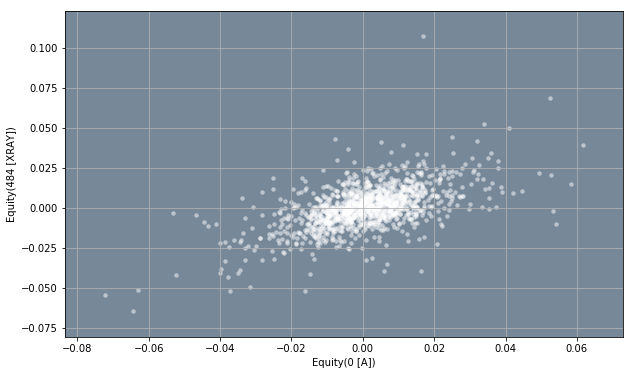

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# # Make scatter plot
ax = returns.plot.scatter(x = 0, y = 483, grid = True, color = 'white', alpha = 0.5, linewidth = 0)
    
ax.set_facecolor('lightslategray')

# TODO:

In the code below, write a function `get_num_components(df, var_ret)` that takes a dataframe, `df`, and a value for the desired amount of variance you want to retain from the `df` dataframe,`var_ret`. In this case, the parameter `df` should be the `returns` dataframe obtained above. The parameter  `var_ret` must be anumber between 0 and 1. The function should return the number of principal components you need to retain that amount of variance. To do this, use Scikit-Learn's PCA() class and its `.explained_variance_ratio_`. The function should also print the total amount of variance retained. 

In [6]:
# import resources
from sklearn.decomposition import PCA


def get_num_components(df, var_ret):
    
    if var_ret > 1 or var_ret < 0:
        print('Error')
        return 0
    
    if var_ret == 1:
        return df.shape[1]
        
    pca = PCA(n_components = df.shape[1])

    pca.fit(df)
    
    needed_components = 0
    
    var_sum = 0
    
    for i in range(0, df.shape[1]):

        if var_sum >= var_ret:
            print('Total Variance Retained: ', pca.explained_variance_ratio_[0:needed_components].sum())
            return needed_components
        else:
            needed_components += 1            
            var_sum += pca.explained_variance_ratio_[i]
            
num_components = get_num_components(returns, 0.9)

print('\nNumber of Principal Components Needed: ', num_components)

Total Variance Retained:  0.900236862496

Number of Principal Components Needed:  179


# TODO:

In the previous section you calculated the number of principal compenents needed to retain a given amount of variance. As you might notice you can greatly reduce the dimensions of the data even if you retain a high level of variance (`var_ret` > 0.9). In the code below, use the number of components needed calculated in the last section, `num_components` to calculate by the percentage of dimensionality reduction. For example, if the original data was 100-dimensional, and the amount of components needed to retian a certain amount of variance is 70, then we are able to reduce the data by 30%. 

In [7]:
# Calculate the percentage of dimensionality reduction
red_per = ((returns.shape[1] - num_components) / returns.shape[1]) * 100

print('We were able to reduce the dimenionality of the data by:', red_per, 'percent')

We were able to reduce the dimenionality of the data by: 63.469387755102034 percent
